<a href="https://colab.research.google.com/github/cosimo-schiavoni/Massive_Data_Project/blob/main/Cats_Dogs_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Thu Jul  7 02:21:23 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# Keras / Deep Learning
import tensorflow as tf
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras import optimizers, regularizers
from tensorflow.keras.optimizers import Adam

In [3]:
from functools import reduce
from google.colab import files
import os
import zipfile
import numpy as np

#from my model
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
import pickle
import shutil
import random
import skimage.io as io
from copy import deepcopy



In [4]:
import os
import zipfile
os.environ["data_source"] = "./Cats_Dogs_data"

if not os.path.exists(os.environ["data_source"]):
  os.makedirs(os.environ["data_source"])
  if "download" not in os.listdir():
    if "download.zip" not in os.listdir():
      ! wget https://unimibox.unimi.it/index.php/s/eNGYGSYmqynNMqF/download/CatsDogs.zip
      with zipfile.ZipFile("CatsDogs.zip", 'r') as f:
        f.extractall("CatsDogs")
    os.remove("CatsDogs.zip")


!mv "./CatsDogs/CatsDogs/Cats" "./Cats_Dogs_data"
!mv "./CatsDogs/CatsDogs/Dogs" "./Cats_Dogs_data"

!rm -rf CatsDogs

--2022-07-07 02:21:37--  https://unimibox.unimi.it/index.php/s/eNGYGSYmqynNMqF/download/CatsDogs.zip
Resolving unimibox.unimi.it (unimibox.unimi.it)... 159.149.53.190
Connecting to unimibox.unimi.it (unimibox.unimi.it)|159.149.53.190|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘CatsDogs.zip’

CatsDogs.zip            [        <=>         ] 812.79M  1.26MB/s    in 3m 10s  

2022-07-07 02:24:48 (4.28 MB/s) - ‘CatsDogs.zip’ saved [852272294]



In [43]:
bad_file_list

[]

In [41]:
for i in range (len(bad_file_list)):
        os.remove(bad_file_list[i])

In [42]:
os.path.getsize('./Cats_Dogs_data/Cats/3823.jpg')

46058

In [104]:
import os
import cv2
import imghdr
from PIL import Image

img = cv2.imread('./Cats_Dogs_data/Cats/2939.jpg', cv2.IMREAD_UNCHANGED)
len(img.shape)

AttributeError: ignored

In [99]:
channels_images

['./Cats_Dogs_data/Cats/11874.jpg',
 './Cats_Dogs_data/Cats/2939.jpg',
 './Cats_Dogs_data/Cats/936.jpg',
 './Cats_Dogs_data/Cats/3491.jpg',
 './Cats_Dogs_data/Cats/10820.jpg',
 './Cats_Dogs_data/Cats/2663.jpg',
 './Cats_Dogs_data/Cats/10404.jpg',
 './Cats_Dogs_data/Cats/7978.jpg',
 './Cats_Dogs_data/Cats/140.jpg',
 './Cats_Dogs_data/Cats/7968.jpg',
 './Cats_Dogs_data/Cats/5686.jpg',
 './Cats_Dogs_data/Cats/4833.jpg',
 './Cats_Dogs_data/Cats/10501.jpg',
 './Cats_Dogs_data/Cats/9171.jpg',
 './Cats_Dogs_data/Cats/5553.jpg',
 './Cats_Dogs_data/Cats/8470.jpg',
 './Cats_Dogs_data/Cats/9565.jpg',
 './Cats_Dogs_data/Cats/11935.jpg',
 './Cats_Dogs_data/Cats/9778.jpg',
 './Cats_Dogs_data/Cats/3300.jpg',
 './Cats_Dogs_data/Cats/7276.jpg',
 './Cats_Dogs_data/Cats/10125.jpg',
 './Cats_Dogs_data/Cats/11210.jpg',
 './Cats_Dogs_data/Cats/11565.jpg',
 './Cats_Dogs_data/Cats/666.jpg',
 './Cats_Dogs_data/Cats/850.jpg',
 './Cats_Dogs_data/Cats/660.jpg',
 './Cats_Dogs_data/Dogs/5736.jpg',
 './Cats_Dogs_dat

In [33]:
if 1==1:
    try:
      if len((cv2.imread('./Cats_Dogs_data/Dogs/3823.jpg', cv2.IMREAD_UNCHANGED)).shape) == 3:
        print('ok')
      else:
        print('discard')
    except:
        print('discard')


discard


In [32]:
len((cv2.imread('./Cats_Dogs_data/Dogs/3823.jpg', cv2.IMREAD_UNCHANGED)).shape)

AttributeError: ignored

In [21]:

def check_channels( s_dir):
    channels_images=[]
    s_list= os.listdir(s_dir)
    for klass in s_list:
        klass_path=os.path.join (s_dir, klass)
        #print ('processing class directory ', klass)
        if os.path.isdir(klass_path):
            file_list=os.listdir(klass_path)
            for f in file_list:               
                f_path=os.path.join (klass_path,f)
                tip = imghdr.what(f_path)
                ######################## get width and height
                #print(f_path)
                if len((cv2.imread(f_path, cv2.IMREAD_UNCHANGED)).shape) == 3:
                  print(f_path)
                else:
                  print('')
    return channels_images

source_dir =r'./Cats_Dogs_data'
channels_images = check_channels(source_dir)

Streaming output truncated to the last 5000 lines.
./Cats_Dogs_data/Dogs/633.jpg
./Cats_Dogs_data/Dogs/6175.jpg
./Cats_Dogs_data/Dogs/8737.jpg
./Cats_Dogs_data/Dogs/1227.jpg
./Cats_Dogs_data/Dogs/3030.jpg
./Cats_Dogs_data/Dogs/6278.jpg
./Cats_Dogs_data/Dogs/623.jpg
./Cats_Dogs_data/Dogs/7629.jpg
./Cats_Dogs_data/Dogs/9846.jpg
./Cats_Dogs_data/Dogs/9913.jpg
./Cats_Dogs_data/Dogs/8310.jpg
./Cats_Dogs_data/Dogs/5553.jpg
./Cats_Dogs_data/Dogs/1604.jpg
./Cats_Dogs_data/Dogs/10343.jpg
./Cats_Dogs_data/Dogs/2487.jpg
./Cats_Dogs_data/Dogs/5012.jpg
./Cats_Dogs_data/Dogs/10529.jpg
./Cats_Dogs_data/Dogs/670.jpg
./Cats_Dogs_data/Dogs/10030.jpg
./Cats_Dogs_data/Dogs/6584.jpg
./Cats_Dogs_data/Dogs/8406.jpg
./Cats_Dogs_data/Dogs/6281.jpg
./Cats_Dogs_data/Dogs/9561.jpg
./Cats_Dogs_data/Dogs/11473.jpg
./Cats_Dogs_data/Dogs/3912.jpg
./Cats_Dogs_data/Dogs/1491.jpg
./Cats_Dogs_data/Dogs/3543.jpg
./Cats_Dogs_data/Dogs/7221.jpg
./Cats_Dogs_data/Dogs/3385.jpg
./Cats_Dogs_data/Dogs/5800.jpg
./Cats_Dogs_data/D

In [11]:
import os
import cv2
import imghdr
from PIL import Image

def check_images( s_dir, ext_list):
    bad_images=[]
    s_list= os.listdir(s_dir)
    for klass in s_list:
        klass_path=os.path.join (s_dir, klass)
        print ('processing class directory ', klass)
        if os.path.isdir(klass_path):
            file_list=os.listdir(klass_path)
            for f in file_list:               
                f_path=os.path.join (klass_path,f)
                tip = imghdr.what(f_path)
                ######################## get width and height
                if (ext_list.count(tip) == 0) or (not (os.path.getsize(f_path) > 100)) or (not (Image.open(f_path).width > 200 and Image.open(f_path).height > 200)):
                  bad_images.append(f_path)
                  #os.remove(f_path)
                else:
                  try:
                    if len((cv2.imread(f_path, cv2.IMREAD_UNCHANGED)).shape) == 3:
                      print(f, ' in class directory ', klass, 'has got 3 channels')
                    else:
                      #os.remove(f_path)
                      print('discard ', f, ' in class directory ', klass, 'has got', len((cv2.imread(f_path, cv2.IMREAD_UNCHANGED)).shape), 'channels')
                      bad_images.append(f_path)
                  except:
                      #os.remove(f_path)
                      print('discard file ', f_path, ' is not a valid image file')
                      bad_images.append(f_path)
            return bad_images

source_dir =r'./Cats_Dogs_data'
good_exts=['jpg', 'png', 'jpeg', 'gif', 'bmp' ] # list of acceptable extensions
bad_file_list =check_images(source_dir, good_exts)
if len(bad_file_list) !=0:
    print('improper image files are listed below')
    for i in range (len(bad_file_list)):
        os.remove(bad_file_list[i])
        #print (bad_file_list[i])
else:
    print(' no improper image files were found')


Streaming output truncated to the last 5000 lines.
8908.jpg  in class directory  Cats has got 3 channels
311.jpg  in class directory  Cats has got 3 channels
2716.jpg  in class directory  Cats has got 3 channels
3990.jpg  in class directory  Cats has got 3 channels
3538.jpg  in class directory  Cats has got 3 channels
838.jpg  in class directory  Cats has got 3 channels
11119.jpg  in class directory  Cats has got 3 channels
1791.jpg  in class directory  Cats has got 3 channels
12167.jpg  in class directory  Cats has got 3 channels
5219.jpg  in class directory  Cats has got 3 channels
1665.jpg  in class directory  Cats has got 3 channels
6578.jpg  in class directory  Cats has got 3 channels
5713.jpg  in class directory  Cats has got 3 channels
1636.jpg  in class directory  Cats has got 3 channels
7116.jpg  in class directory  Cats has got 3 channels
705.jpg  in class directory  Cats has got 3 channels
6590.jpg  in class directory  Cats has got 3 channels
4955.jpg  in class directory  Ca

In [27]:
#data augmentation

@tf.function
def random_invert_img(x, p=0.5):
  if  tf.random.uniform([]) < p:
    x = (180-x)
  else:
    x
  return x

###Randim invert
@tf.function 
def random_invert(factor=0.5):
  return layers.Lambda(lambda x: random_invert_img(x, factor))

#@tf.function 
class RandomInvert(layers.Layer):
  @tf.function 
  def __init__(self, factor=0.5, **kwargs):
    super().__init__(**kwargs)
    self.factor = factor
  @tf.function 
  def call(self, x):
    return random_invert_img(x)


###Kernel Inizializer Sobel_x
@tf.function 
def hedge_detector(shape, dtype=None):
    print(shape)    
    sobel_x = tf.constant(
        [
            [-5, -4, 0, 4, 5], 
            [-8, -10, 0, 10, 8], 
            [-10, -20, 0, 20, 10], 
            [-8, -10, 0, 10, 8], 
            [-5, -4, 0, 4, 5]
        ], dtype=dtype )
    #create the missing dims.
    sobel_x = tf.reshape(sobel_x, (5, 5, 1, 1))

    print(tf.shape(sobel_x))
    #tile the last 2 axis to get the expected dims.
    sobel_x = tf.tile(sobel_x, (1, 1, shape[-2],shape[-1]))

    print(tf.shape(sobel_x))
    return sobel_x

@tf.function 
def vertical_detector(shape, dtype=None):
    print(shape)    
    sobel_x = tf.constant(
        [
            [1, 0, -1], 
            [1, 0, -1], 
            [1, 0, -1]
        ], dtype=dtype )
    #create the missing dims.
    sobel_x = tf.reshape(sobel_x, (3, 3, 1, 1))

    print(tf.shape(sobel_x))
    #tile the last 2 axis to get the expected dims.
    sobel_x = tf.tile(sobel_x, (1, 1, shape[-2],shape[-1]))

    print(tf.shape(sobel_x))
    return sobel_x

@tf.function 
def horizontal_detector(shape, dtype=None):
    print(shape)    
    sobel_x = tf.constant(
        [
            [1, 1, 1], 
            [0, 0, 0], 
            [-1, -1, -1]
        ], dtype=dtype )
    #create the missing dims.
    sobel_x = tf.reshape(sobel_x, (3, 3, 1, 1))

    print(tf.shape(sobel_x))
    #tile the last 2 axis to get the expected dims.
    sobel_x = tf.tile(sobel_x, (1, 1, shape[-2],shape[-1]))

    print(tf.shape(sobel_x))
    return sobel_x

In [28]:

def get_compiled_model():
    # Make a simple 2-layer densely-connected neural network.
        ###Create CNN
    #Initialize the CNN
    cnn = tf.keras.models.Sequential()
     
    cnn.add(tf.keras.Sequential([
      layers.RandomFlip("horizontal_and_vertical"),
      layers.RandomRotation(0.3),
        layers.RandomContrast(0.5, seed=None),
        RandomInvert(),
        layers.RandomZoom(height_factor=(-0.2, +0.3)),
        layers.RandomTranslation(height_factor=(-0.2, +0.3),width_factor=(-0.2, +0.3)),
        layers.Rescaling(1./255, offset= -1)
        ]))
    
    #DROPOUT
    #Introduce the Convolution layer with Kernel_initializer=Sobel_x
    #Convolution
    cnn.add(tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu',  input_shape = [350,350,3]))
    #Pooling
    cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))
    #Convolution
    cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3,  strides=2, activation = 'relu'))
    #Pooling
    cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))
    #Flattening
    cnn.add(tf.keras.layers.Flatten())
    #Full Connection
    cnn.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))
    #Output Layer
    cnn.add(tf.keras.layers.Dense(units=1, activation = 'sigmoid'))
    ###Training CNN
    #Compiling the CNN
    cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return cnn


def get_dataset():
    BUFFER_SIZE = 10000

    BATCH_SIZE_PER_REPLICA = 64
    BATCH_SIZE = BATCH_SIZE_PER_REPLICA * strategy.num_replicas_in_sync

    data_dir= "./Cats_Dogs_data"

    tf.random.set_seed(123456)

    EPOCHS = 15
    #BATCH_SIZE = 32
    #IMG_SIZE = (160, 160)
    IMG_SIZE = (350, 350)

    os.listdir(data_dir)


    train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
        data_dir,
        validation_split=0.3,
        subset="training",
        shuffle=True,
        seed=123456,
        image_size= IMG_SIZE,
        batch_size=BATCH_SIZE)


    validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
        data_dir,
        validation_split=0.3,
        subset="validation",
        shuffle=True,
        seed=123456,
        image_size= IMG_SIZE,
        batch_size=BATCH_SIZE)
    
    val_batches = tf.data.experimental.cardinality(validation_dataset)
    test_dataset = validation_dataset.take(val_batches // 5)
    validation_dataset = validation_dataset.skip(val_batches // 5)
    print('Number of training batches: %d' % tf.data.experimental.cardinality(train_dataset))
    print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))
    print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))

    AUTOTUNE = tf.data.AUTOTUNE

    train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
    validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
    test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

    return (
        train_dataset,
        validation_dataset,
        test_dataset
    )




In [29]:
# Create a MirroredStrategy.
strategy = tf.distribute.MirroredStrategy()
print("Number of devices: {}".format(strategy.num_replicas_in_sync))


INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
Number of devices: 1


In [30]:

# Open a strategy scope.
with strategy.scope():
    # Everything that creates variables should be under the strategy scope.
    # In general this is only model construction & `compile()`.
    model = get_compiled_model()


In [31]:

# Train the model on all available devices.
train_dataset, validation_dataset, test_dataset = get_dataset()
model_fit = model.fit(train_dataset, epochs=15, validation_data=validation_dataset)
model_fit

Found 23762 files belonging to 2 classes.
Using 16634 files for training.
Found 23762 files belonging to 2 classes.
Using 7128 files for validation.
Number of training batches: 260
Number of validation batches: 90
Number of test batches: 22
Epoch 1/15
  4/260 [..............................] - ETA: 39s - loss: 2.8905 - accuracy: 0.4922

InvalidArgumentError: ignored

In [ ]:

# Test the model on all available devices.
model.evaluate(test_dataset)

12/12 [==============================] - 3s 154ms/step - loss: 0.6558 - accuracy: 0.6263


[0.6558408141136169, 0.6263020634651184]

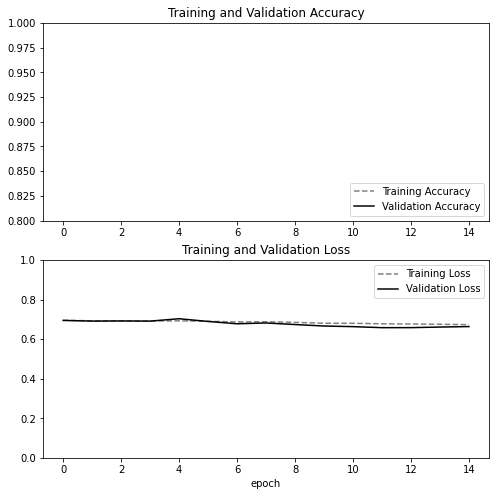

In [ ]:
#There are two variable objects. Divided between around 2.5 million of MobilNet parameters which 
#are frozen, and 1.2 thousand of trainable parameter in the Dense layer
#len(cnn.trainable_variables)

acc = model_fit.history['accuracy']
val_acc = model_fit.history['val_accuracy']
loss_ = model_fit.history['loss']
val_loss_ = model_fit.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy', color = 'gray',linestyle='dashed')
plt.plot(val_acc, label='Validation Accuracy', color = 'black')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss_, label='Training Loss', color = 'gray',linestyle='dashed')
plt.plot(val_loss_, label='Validation Loss', color = 'black')
plt.ylim([0, 1.0])
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()
